# Lectura y graficación de una señal almacenada en un archivo txt

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import re

## Abrimos el archivo txt para ver  el contenido

In [2]:
f = open("Signal_Basal_30s.txt","r")
raw_data = f.readline()  # con f.read() leemos todo el contenido
f.close()

raw_data

FileNotFoundError: ignored

In [ ]:
## Expresion regular para buscar automaticamente el contenido de un numero dentro de un string
x = re.findall("[0-5][0-9]\d", raw_data)

print(x)

[]


In [ ]:
Fs = 1000

## Leemos el archivo excluyendo las 3 primeras filas del archivo

In [ ]:
array = np.genfromtxt("./Signal_Basal_30s.txt", delimiter="	",skip_header = 3)
array

array([[  0.,   0.,   0., ...,   0., 564.,  nan],
       [  1.,   0.,   0., ...,   0., 574.,  nan],
       [  2.,   0.,   0., ...,   0., 588.,  nan],
       ...,
       [  7.,   0.,   0., ...,   0., 512.,  nan],
       [  8.,   0.,   0., ...,   0., 506.,  nan],
       [  9.,   0.,   0., ...,   0., 496.,  nan]])

## Ploteamos la lectura

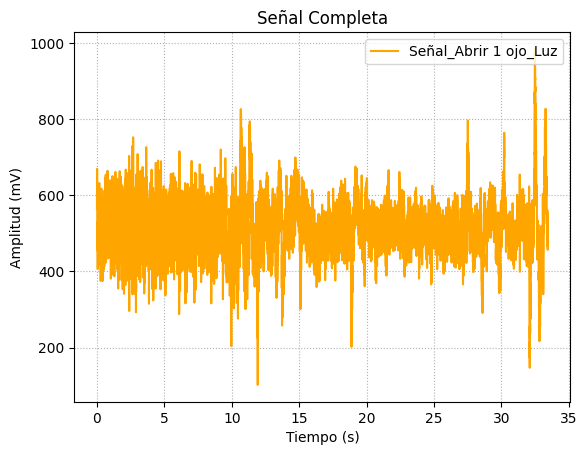

In [ ]:
#Tiempo de inicio
Ts = 1/Fs
#Ver donde se contrae
timeall=np.arange(0,len(array[:,5])/Fs,Ts)
plt.plot(timeall, array[:,5], label="Señal_Abrir 1 ojo_Luz", color="orange")      # graficamos la señal
# plt.ylim(200,900)
plt.grid(linestyle=":")
plt.xlabel("Tiempo (s)")
plt.ylabel("Amplitud (mV)")
plt.title("Señal Completa")
plt.legend(loc="upper right")
plt.show()
#graficar

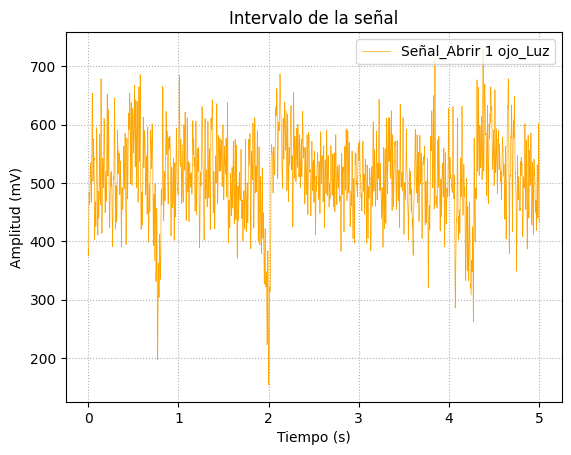

In [ ]:
# Ploteamos los sectores que se quieren.
t = np.arange(0,5,Ts)                                   # Domnminio del tieempo
i=32000                                                 # Para seleccionar el tiempo que se quiere
last=5000+i                                             # Esta en ms

plt.plot(t, array[i:last,5], label="Señal_Abrir 1 ojo_Luz", linewidth = 0.5, color="orange")      # graficamos la señal
# plt.ylim(200,900)
plt.grid(linestyle=":")
plt.xlabel("Tiempo (s)")
plt.ylabel("Amplitud (mV)")
plt.title("Intervalo de la señal")
plt.legend(loc="upper right")
plt.show()

## La forma de sabes la frecuencia de la señal es viendo en el dominio de la frecuencia

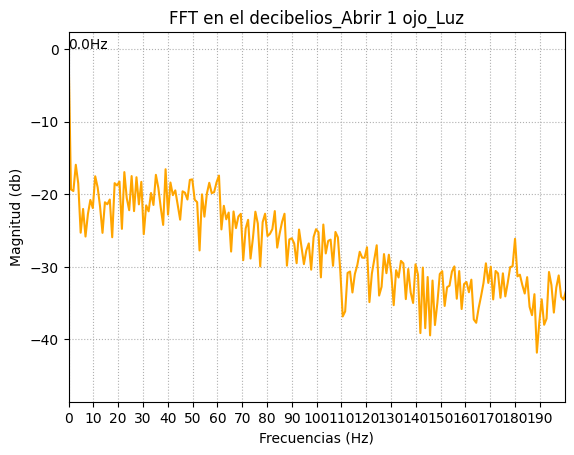

In [ ]:
N = 2**10                                     # 10 bits, 0-1023

signal1 = array[1500:31500,5]

signal_fft = np.fft.fft(signal1, N)           # fft magtinud
signal_fft = np.round(np.abs(signal_fft),3)[0:N//2] # nos quedamos con los componente de la derecha de la FFT
signal_aux = signal_fft/signal_fft.max()     # hallamos el maximo para pasar la magnitud a escala db

with np.errstate(divide='ignore'):
    signal_fft_db = 10*np.log10(signal_aux)  # , out=signal_aux, where=signal_aux >= 0 para evitar division por zero

F_list = np.linspace(0,Fs/2, N//2)
F = np.round(F_list[np.argmax(signal_fft_db)], 1)   # argmax, encuentra el argumento max en un array

plt.plot(F_list, signal_fft_db, color="orange")  #10 * np.log10(P / Pref) , decibelios
plt.text(F,0, f"{F}Hz")
plt.grid(linestyle=":")
plt.ylabel("Magnitud (db)")
plt.xlabel("Frecuencias (Hz)")
plt.title("FFT en el decibelios_Abrir 1 ojo_Luz")
plt.xlim([0,200])
plt.xticks(np.arange(0,200,10))
plt.show()

## Haciendo regreisón Lineal para el FFT

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures

from sklearn.metrics import r2_score

In [ ]:
X = F_list.reshape(-1, 1)
y = signal_fft_db.reshape(-1, 1)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=47, test_size = 0.2)
lmodel = LinearRegression()
lmodel.fit(X_train, y_train)

LinearRegression()

In [ ]:
y_pred = lmodel.predict(X_test)

In [ ]:
r2_Lin = r2_score(y_test, y_pred)
print("Coeficiente de determinación R²:", r2_Lin)

Coeficiente de determinación R²: 0.7217634218311535


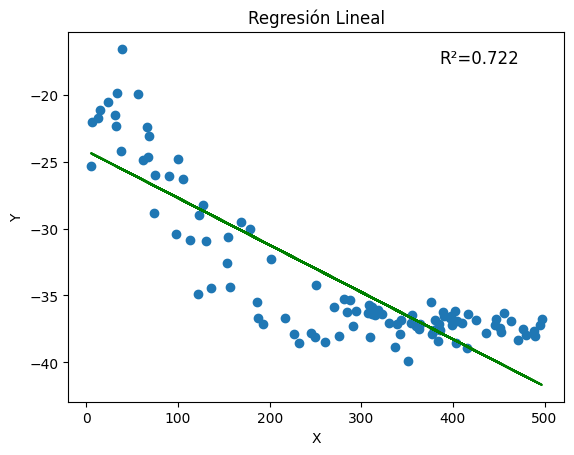

In [ ]:
plt.scatter(X_test,y_test, label="points")
plt.plot(X_test, y_pred, color="green", label="linear model")
plt.title('Regresión Lineal')
plt.xlabel('X')
plt.ylabel('Y')
plt.text(0.95*np.max(X_test), np.max(y_test), f"R²={r2_Lin:.3f}", ha='right', va='top', fontsize=12)
plt.show()

## Haciendo Regresión Polinomial

Coeficiente de determinación R²: 0.8795372773775277


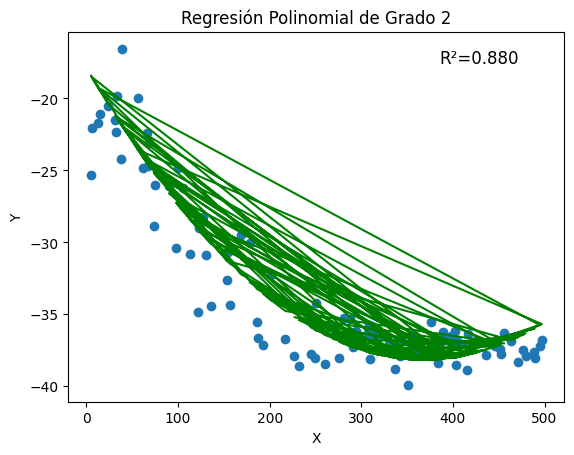

In [ ]:
# Crear objeto PolynomialFeatures con grado 3
poly = PolynomialFeatures(degree=2)

# Transformar los datos de entrada del conjunto de entrenamiento a un espacio polinomial de grado 3
X_poly_train = poly.fit_transform(X_train)

# Crear objeto LinearRegression
model = LinearRegression()

# Ajustar el modelo a los datos de entrada transformados del conjunto de entrenamiento
model.fit(X_poly_train, y_train)

# Transformar los datos de entrada del conjunto de prueba a un espacio polinomial de grado 3
X_poly_test = poly.transform(X_test)

# Predecir los valores de y para los valores de x del conjunto de prueba
y_pred_pol = model.predict(X_poly_test)


# Calcular R² para el conjunto de prueba
r2 = r2_score(y_test, y_pred_pol)
print("Coeficiente de determinación R²:", r2)


# Graficar los resultados del conjunto de prueba
plt.scatter(X_test, y_test)
plt.plot(X_test, y_pred_pol, color='green')
plt.title('Regresión Polinomial de Grado 2')
plt.xlabel('X')
plt.ylabel('Y')
plt.text(0.95*np.max(X_test), np.max(y_test), f"R²={r2:.3f}", ha='right', va='top', fontsize=12)

plt.show()
